# 『ガウス過程と機械学習』3.6章ガウス過程回帰の一般化

## 近似手法

### ラプラス近似
連続変数の集合上に定義されている確率変数関数に対して，ガウス分布による近似を見出すことを目的としています．

以下にラプラス近似の流れを説明します．

求めたい分布$p(\vec{x})$として
$$
p(\vec{x}) = \frac{1}{Z} f(\vec{x})
$$
と書けるとします．

まずはピークを見つけます．

つまり
$$
\frac{\partial p(\vec{x}_0)}{\partial \vec{x}} = 0
$$
を満たす$\vec{x}_0$を求めます．

次に，対数を取ってその$x_0$点周りでテイラー展開をします．
$$
\log p(\vec{x}) = \log p(\vec{x}_0) + \frac{1}{2}(\vec{x} - \vec{x}_0)^T \nabla \nabla \log p(\vec{x}_0) (\vec{x} - \vec{x}_0) + \cdots
$$

ここで，$\textbf{A} = - \nabla \nabla \log p(\vec{x}_0)$をヘッセ行列と定義します．

そのヘッセ行列を用いて以下のように近似をします．
$$
p(\vec{x}) \approx \frac{|\textbf{A}|^{1/2}}{2\pi^{M/2}} \exp \left( - \frac{1}{2} (\vec{x} - \vec{x}_0)^T \textbf{A} (\vec{x} - \vec{x}_0) \right)
$$


簡単な具体例を以下に示します．

範囲が$-\pi$から$\pi$の$\cos$関数をラプラス近似しましょう．

簡単な計算から標準正規分布となることがわかります．

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 範囲を定義
x = np.linspace(-np.pi, np.pi, 1000)

# cos関数
f = np.cos(x)

# cos関数の導関数
def df(x):
    return -np.sin(x)

# cos関数の二階導関数
def ddf(x):
    return -np.cos(x)

In [23]:
# ラプラス近似
# x_0は最大値の点（cos関数の場合は0）
x_0 = 0
laplace_approximation = np.cos(x_0) + df(x_0) * (x - x_0) + 0.5 * ddf(x_0) * (x - x_0)**2

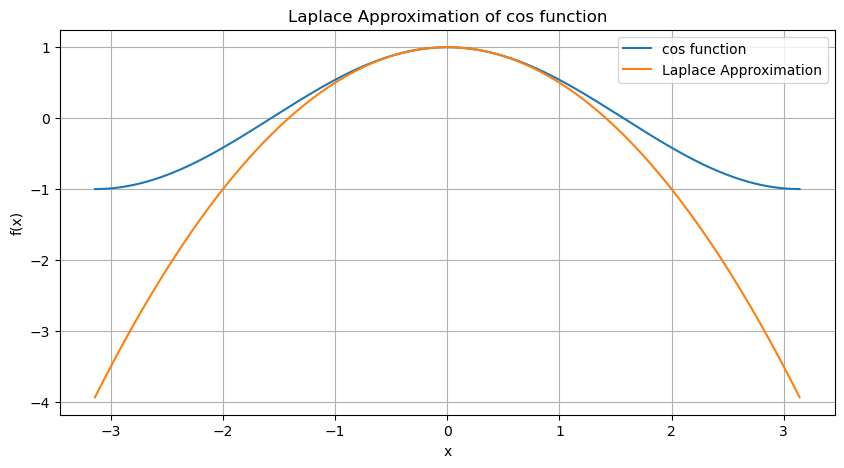

In [24]:
# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(x, f, label='cos function')
plt.plot(x, laplace_approximation, label='Laplace Approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Laplace Approximation of cos function')
plt.grid(True)
plt.show()

ピーク付近で良い近似になっていることがわかります．

### MCMC法
#### 単純モンテカルロ法
モンテカルロ法は，乱数を用いて積分や和を求める計算手法です．

物理現象に関する乱数発生規則は，ボルツマン分布に従うということから
$$
P[C] = \frac{1}{Z} e^{-\beta E[C]}
$$
で与えられます．

この発生規則に対する何らかの関数の期待値を求めたいとします．
$$
\langle f \rangle = \sum_C f[C] P[C]
$$

これを近似的に計算するために，以下のような方法を考えます．
$$
\langle f \rangle \simeq \frac{1}{N} \sum^{N}_{i=1} f[C_i]
$$

この規則から乱数を発生させれば良いのですが，やはり分配関数の計算が大変です．

そこで分配関数を直接計算せずに，シミュレーションを行える方法が次に説明するマルコフ連鎖モンテカルロ法です．

#### MCMC法
マルコフ連鎖モンテカルロ法は，マルコフ連鎖を用いて，分配関数を計算せずにシミュレーションを行う方法です．

マルコフ連鎖とは，ある状態から別の状態に遷移する確率が，その状態のみに依存するような確率過程のことです．
$$
P[C_{t+1} | C_t, C_{t-1}, \cdots, C_0] = P[C_{t+1} | C_t]
$$

また，次の式が成り立つとき，分布$p_*[C]$を定常分布と呼びます．
$$
\sum_{C'} p_*[C'] P[C | C'] = p_*[C]
$$

定常分布がサンプルを取り出したい事後分布として，その定常分布に収束するような推移確率$ P[C_{t+1}|C_t]$を設計するのがマルコフ連鎖モンテカルロ法アイディアです．

$p_*[C]$が定常分布となるための十分条件として，以下の詳細釣り合い条件があります．
$$
p_*[C] P[C'|C] = p_*[C'] P[C|C']
$$

この式を$C'$で総和を取ると定常分布の定義式になります．

#### MH法
有名なMCMC法としてMetropolis-Hastings法があります．

In [54]:
import numpy as np
from scipy.stats import norm

# データの生成
X = np.arange(0, 5, 0.2)
Y = np.arange(0, 5, 0.2)
noise = np.random.normal(0, 0.5, len(X))
Y = X + noise

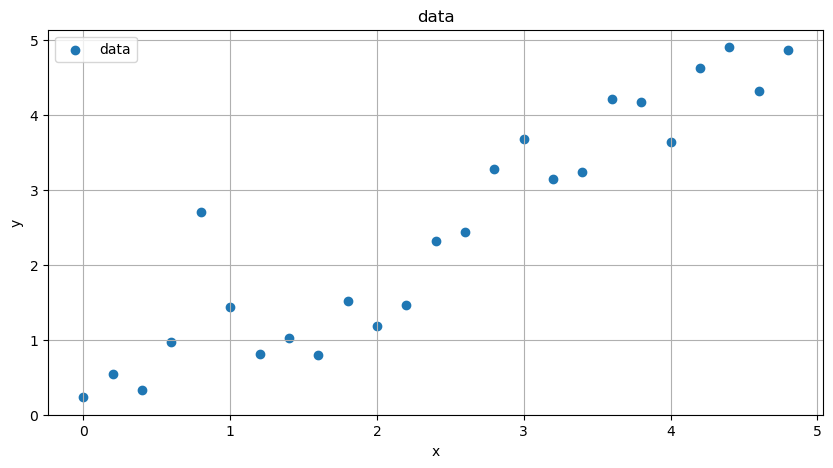

In [55]:
# データのプロット
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('data')
plt.grid(True)
plt.show()

 /tmp/ipykernel_3270462/1574856592.py:16: FutureWarning:In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.
 /home/mori/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning:Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.


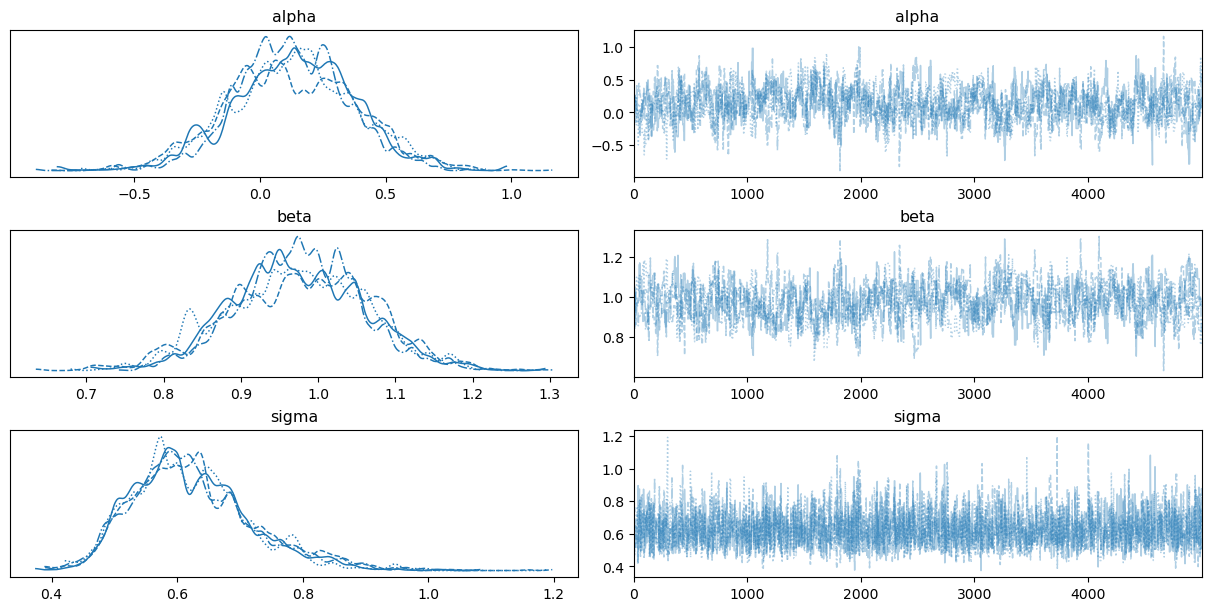

In [60]:
# PyMC3モデルを定義
with pm.Model() as model:
    # 事前分布を定義
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # 線形関係
    mu = alpha + beta * X

    # 尤度関数を定義
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

    # Metropolis-Hastingsサンプラーを用いてサンプリング
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, tune=1000)

# 結果のプロット
pm.traceplot(trace)
plt.show()

 /home/mori/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning:Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

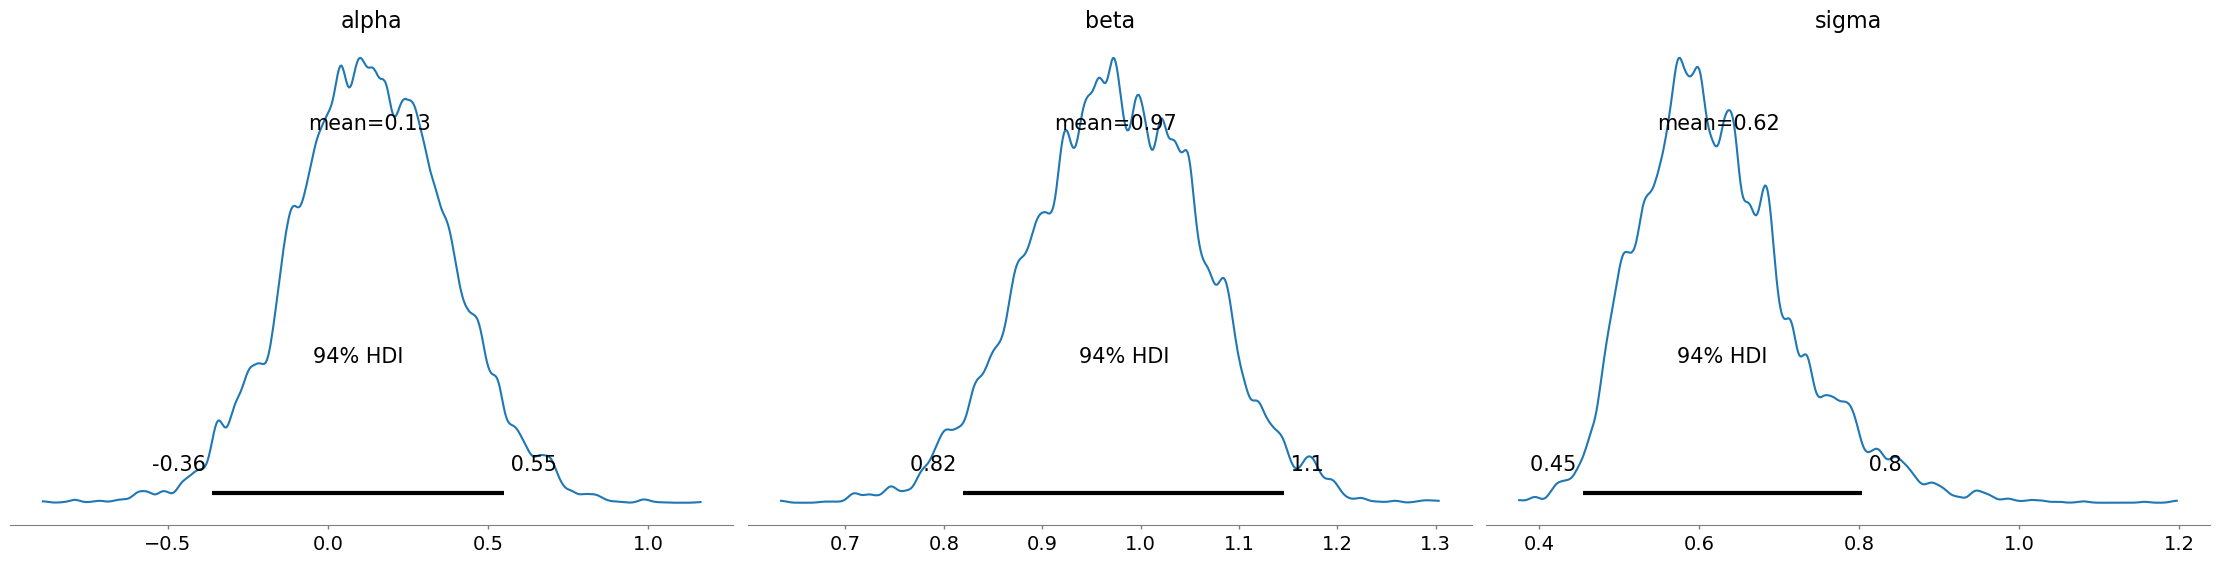

In [62]:
# 事後分布の表示
pm.plot_posterior(trace)

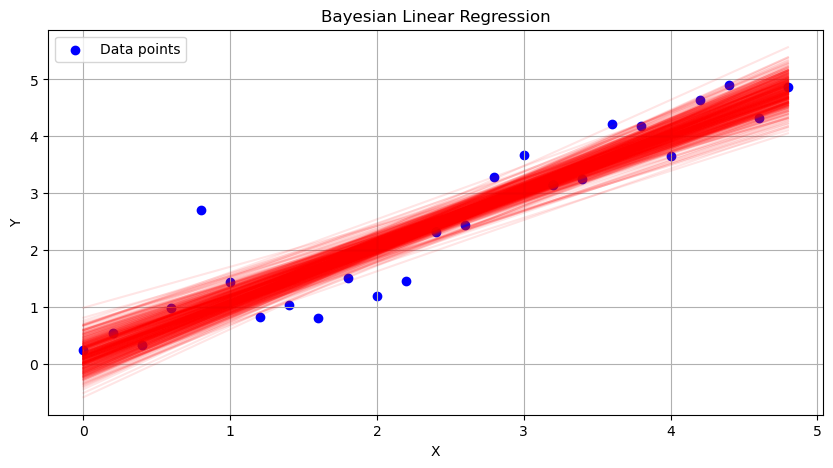

In [61]:
# 事後分布からサンプルされたパラメータを使用して回帰直線を生成
alpha_samples = trace['alpha']
beta_samples = trace['beta']

plt.figure(figsize=(10, 5))

# データ点をプロット
plt.scatter(X, Y, c='blue', label='Data points')

# 事後分布からのパラメータサンプルを使って複数の回帰直線をプロット
for i in range(0, len(alpha_samples), 50):
    plt.plot(X, alpha_samples[i] + beta_samples[i] * X, c='red', alpha=0.1)

# プロットの装飾
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Linear Regression')
plt.legend()
plt.grid(True)

# プロットを表示
plt.show()

推定した事後分布から50本の可能な直線を引きました．

#### EP法


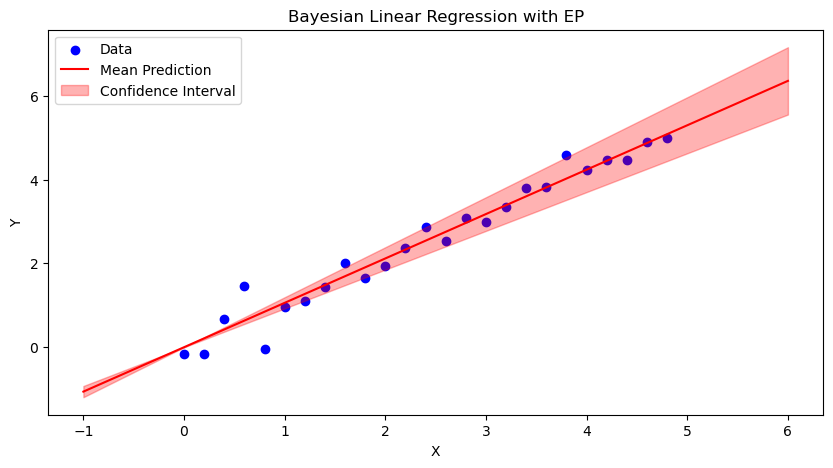

In [65]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# データの生成
X = np.arange(0, 5, 0.2).reshape(-1, 1)
Y = np.arange(0, 5, 0.2).reshape(-1, 1)
noise = np.random.normal(0, 0.5, len(X)).reshape(-1, 1)
Y = X + noise

# ガウス過程の定義
kernel = GPy.kern.Linear(1) + GPy.kern.Bias(1)  # Bias kernelを追加してみる
model = GPy.models.GPRegression(X, Y, kernel)

# EP法で近似
model.inference_method = GPy.inference.latent_function_inference.expectation_propagation.EP()

# ジッターを追加
model.optimize_restarts(num_restarts=3, verbose=False, robust=True) # 再開回数を少なくしてみる

# 予測
X_pred = np.linspace(-1, 6, 100).reshape(-1, 1)
mean, variance = model.predict(X_pred)

# 結果のプロット
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, c='b', label='Data')
plt.plot(X_pred, mean, c='r', label='Mean Prediction')
plt.fill_between(X_pred.flatten(), (mean - 2 * np.sqrt(variance)).flatten(), (mean + 2 * np.sqrt(variance)).flatten(), color='r', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Linear Regression with EP')
plt.show()

### 変分推論

#### 1.近似分布族の選択: 
まず、事後分布 $p(z|x)$ を近似するための分布族 $q(z;\lambda)$ を選びます。ここで、$z$ は潜在変数、$x$ は観測データ、$\lambda$ は近似分布のパラメータです。ガウス分布や平均場近似（各潜在変数が独立であると仮定）などがよく使われます。
#### 2.目的関数の定義: 
変分推論では、近似分布 $q(z;\lambda)$ が真の事後分布 $p(z|x)$ に近くなるようにパラメータ $\lambda$ を選びます。これは、KLダイバージェンスなどを用いて測ることができます。しかし、一般に、変分下限（Evidence Lower BOund; ELBO）と呼ばれる量を最大化する方法が一般的です。ELBOは以下で定義されます。
$$
\text{ELBO}(\lambda) = \mathbb{E}_{q(z;\lambda)}[\log p(x,z)] - \mathbb{E}_{q(z;\lambda)}[\log q(z;\lambda)]
$$
#### 3.最適化:
ELBOを最大化するようなパラメータ $\lambda$ を求めます。これは、勾配上昇法やその他の最適化アルゴリズムを使用して行います。パラメータの更新は、以下のようになります。
$$
\lambda^{(t+1)} = \lambda^{(t)} + \eta \nabla_{\lambda} \text{ELBO}(\lambda^{(t)})
$$
#### 4.近似事後分布の使用: 
$\lambda$ が収束したら、$q(z;\lambda)$ を事後分布の近似として使用します。これを使って、事後予測分布を計算するなど、ベイズモデルの解析を行います。

Finished [100%]: Average Loss = 32.826
/home/mori/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_3270462/1001629502.py:27: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/home/mori/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 wi

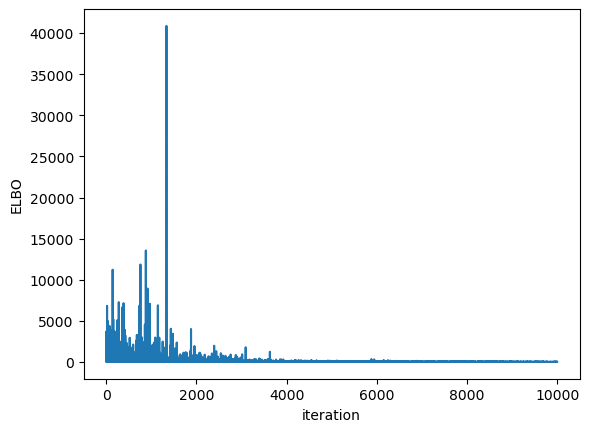

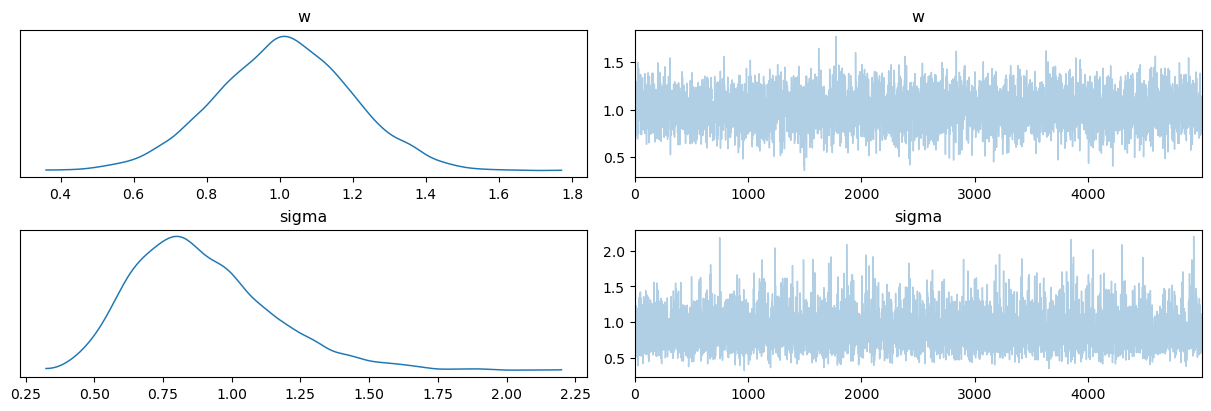

In [31]:
import pymc3 as pm

# モデルの構築
with pm.Model() as model:
    # 事前分布
    w = pm.Normal('w', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # 尤度
    likelihood = pm.Normal('y', mu=w * X, sigma=sigma, observed=Y)
    
    # 変分推論で事後分布を近似
    approx = pm.fit(n=10000, method='advi')
    
# 推論結果のプロット
plt.plot(approx.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration')

# サンプリング
trace = approx.sample(5000)

# 事後分布の要約
pm.summary(trace)

# 事後分布のプロット
pm.traceplot(trace)

plt.show()

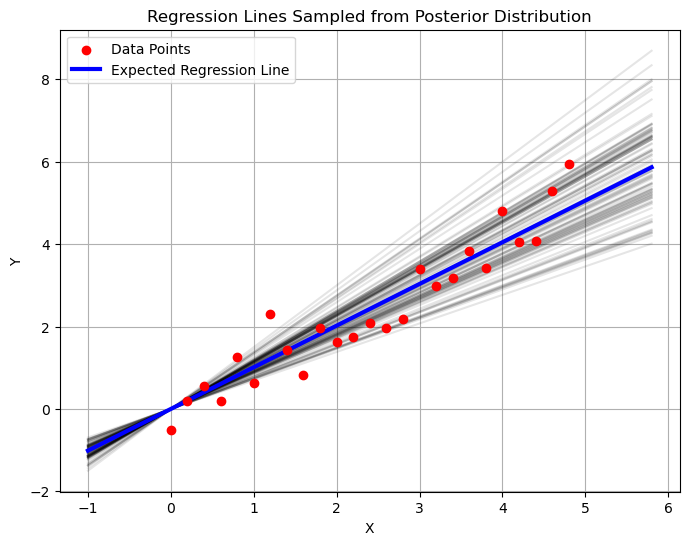

In [32]:
# 事後分布からサンプリングした回帰直線をプロット
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c='red', zorder=10, label='Data Points')
x_values = np.linspace(min(X)-1, max(X)+1, 100)

# サンプリングした重みwを使って回帰直線をプロット
for w_sample in trace['w'][:100]: # 100サンプルだけプロットしてみる
    plt.plot(x_values, w_sample * x_values, 'k-', alpha=0.1)

# 事後分布の期待値に関する回帰直線をプロット
mean_w = np.mean(trace['w'])  # wのサンプルの平均値を計算
plt.plot(x_values, mean_w * x_values, 'b-', lw=3, label='Expected Regression Line')


# グラフ設定
plt.title('Regression Lines Sampled from Posterior Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

サンプリングされた重み $w$ を使用して、期待値を採用したときの予測直線と事後分布から100本の回帰直線をプロットしています。

## 分類問題
### ロジスティック回帰
#### モデル概要
入力$x$と教師データ$t$との関係を以下のようにモデル化します
$$
p(t_i | \omega)  = \sigma(\omega^T x_i)^{t_i} (1 - \sigma(\omega^T x_i))^{1-t_i} \\
$$
つまり，$t_i$が1のときは$\sigma(\omega^T x_i)$，0のときは$1 - \sigma(\omega^T x_i)$となる確率分布に従うとします．(ベルヌーイ分布)

教師ありデータセットが得られたとき，$t$の同時分布に関する対数尤度は
$$
\log p(t | \omega) = \sum_{i=1}^N \{ t_i \log \sigma(\omega^T x_i) + (1 - t_i) \log (1 - \sigma(\omega^T x_i)) \}
$$
となり交差エントロピーとなります．これを最大化することがロジスティック回帰となります．

損失関数$E$は対数尤度にマイナスを付けます．学習とは，この損失関数を最小化することになります．

一回微分は
$$
\frac{\partial E}{\partial \omega} = \sum_{i=1}^N \{ \sigma(\omega^T x_i) - t_i \} x_i
$$

ですから，一般的な方法として勾配降下法を用いてパラメータを更新することが多いです．

sklearnを用いて実装をしていきます．

データの生成：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# データ生成
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# データのスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

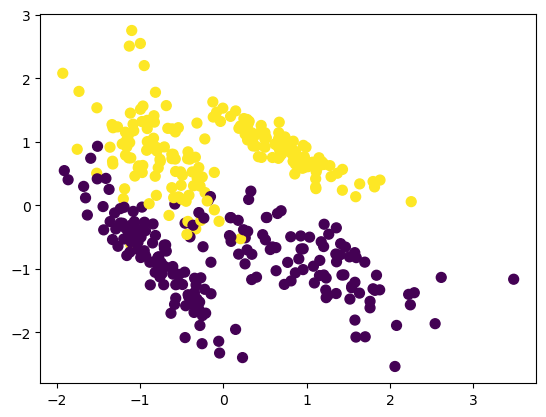

In [35]:
# データの可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', s=50)
plt.show()

In [36]:
# ロジスティック回帰モデルの学習
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータに対する予測
y_pred = model.predict(X_test)

# 結果の評価
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.93


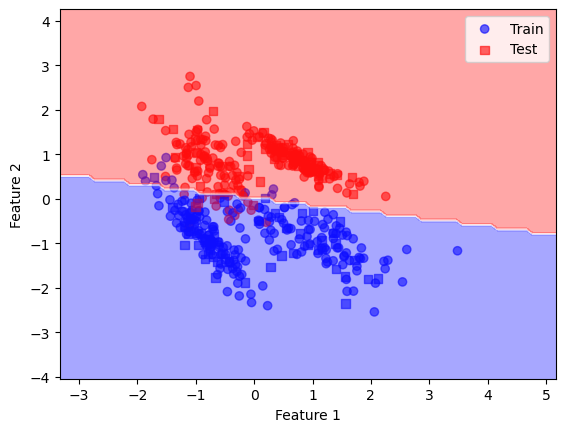

In [37]:
# 散布図の描画
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.6, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.6, marker='s', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 決定境界の描画mu , var
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='bwr')

plt.show()


### ベイズロジスティック回帰
#### モデル概要
入力$x$と教師データ$t$との関係を以下のようにモデル化します
$$
p(t_i | \omega)  = \sigma(\omega^T x_i)^{t_i} (1 - \sigma(\omega^T x_i))^{1-t_i} \\
$$
つまり，$t_i$が1のときは$\sigma(\omega^T x_i)$，0のときは$1 - \sigma(\omega^T x_i)$となる確率分布に従うとします．(ベルヌーイ分布)

教師ありデータセットが得られたとき，$t$の同時分布に関する対数尤度は
$$
\log p(t | \omega) = \sum_{i=1}^N \{ t_i \log \sigma(\omega^T x_i) + (1 - t_i) \log (1 - \sigma(\omega^T x_i)) \}
$$
となり交差エントロピーとなります．これを最大化することがロジスティック回帰となります．

ベイズロジスティック回帰はここから，事前分布$p(\omega)$を導入することでベイズ的にモデル化したものです．

実装には主にPyMC3を用います

データの生成：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
# make_classificationはサンプル数や特徴量数などのいくつかのパラメータを指定することで，簡単に分類用のサンプルデータを生成します．
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy as sp

In [39]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

# 乱数のシードを固定
np.random.seed(42)

# データを生成 (先程と同じデータ)
n_samples = 100
x = np.linspace(0, 20, n_samples)
lambda_ = np.exp(0.3 + 0.1 * x)
y = np.random.poisson(lambda_)

# データフレームにまとめる
data = pd.DataFrame({'x': x, 'y': y})

# ベイズポアソン回帰モデルの設定
with pm.Model() as model:
    # 事前分布を設定（正規分布を使用）
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1)
    
    # ポアソン分布の平均 lambda を計算
    mu = pm.math.exp(alpha + beta * data['x'])
    
    # 尤度関数を設定
    y_obs = pm.Poisson('y_obs', mu=mu, observed=data['y'])
    
    # サンプリング
    trace = pm.sample(2000, tune=1000, target_accept=0.95)

# サンプリング結果の表示
az.plot_trace(trace)
plt.show()

# パラメータの事後分布の要約
print(az.summary(trace, round_to=2))

# 予測のプロット
plt.scatter(x, y, label='Observed counts', alpha=0.6)

# 平均予測
mu_mean = np.exp(trace['alpha'].mean() + trace['beta'].mean() * x)
plt.plot(x, mu_mean, color='red', label='Fitted values')

# 95% 信頼区間
mu_pred = np.exp(trace['alpha'][:, None] + trace['beta'][:, None] * x)
mu_hpd = az.hdi(mu_pred)
plt.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='gray', alpha=0.5, label='95% CI')

plt.xlabel('X')
plt.ylabel('Counts')
plt.legend()
plt.show()'''
features:特徴量数
informative:分類に有用な特徴量数
redundant:分類に無用な特徴量数
'''
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

データの確認作業

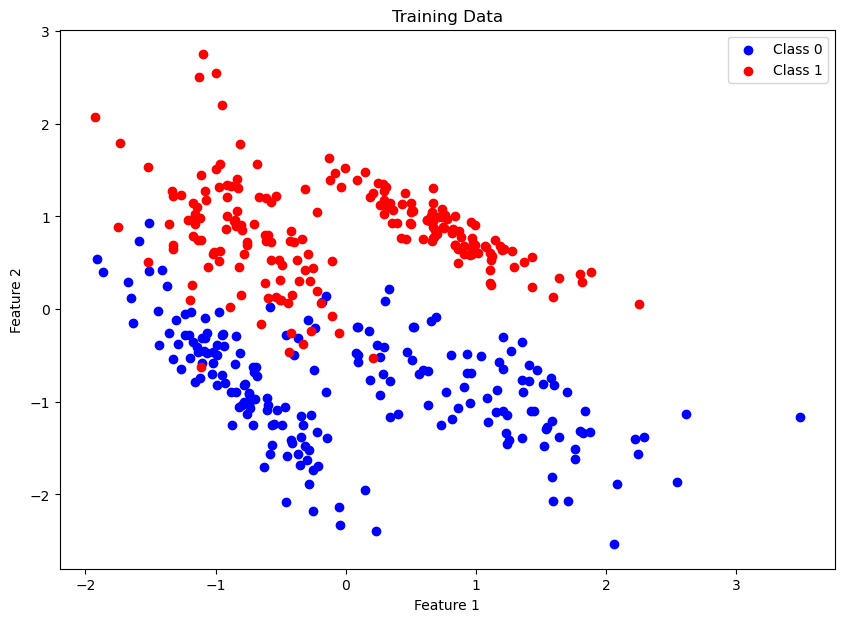

In [40]:
# プロット
plt.figure(figsize=(10, 7))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1')

# ラベルの追加
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 表示
plt.show()

#### ラプラス近似によるベイズロジスティック回帰

In [41]:
# モデルの定義
with pm.Model() as logistic_model:
    # 事前分布の設定
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_train.shape[1])
    # 線形予測子
    mu = alpha + pm.math.dot(X_train, beta)
    # ロジスティック関数
    theta = pm.math.sigmoid(mu)
    # 推定値
    observed = pm.Bernoulli('observed', p=theta, observed=y_train)

    # MAP推定値を計算
    map_estimate = pm.find_MAP()
    
    # メトロポリスサンプリングを用いて近似
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=map_estimate, chains=2, cores=2)


/tmp/ipykernel_3270462/3592100365.py:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, step=step, start=map_estimate, chains=2, cores=2)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 0 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


/home/mori/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


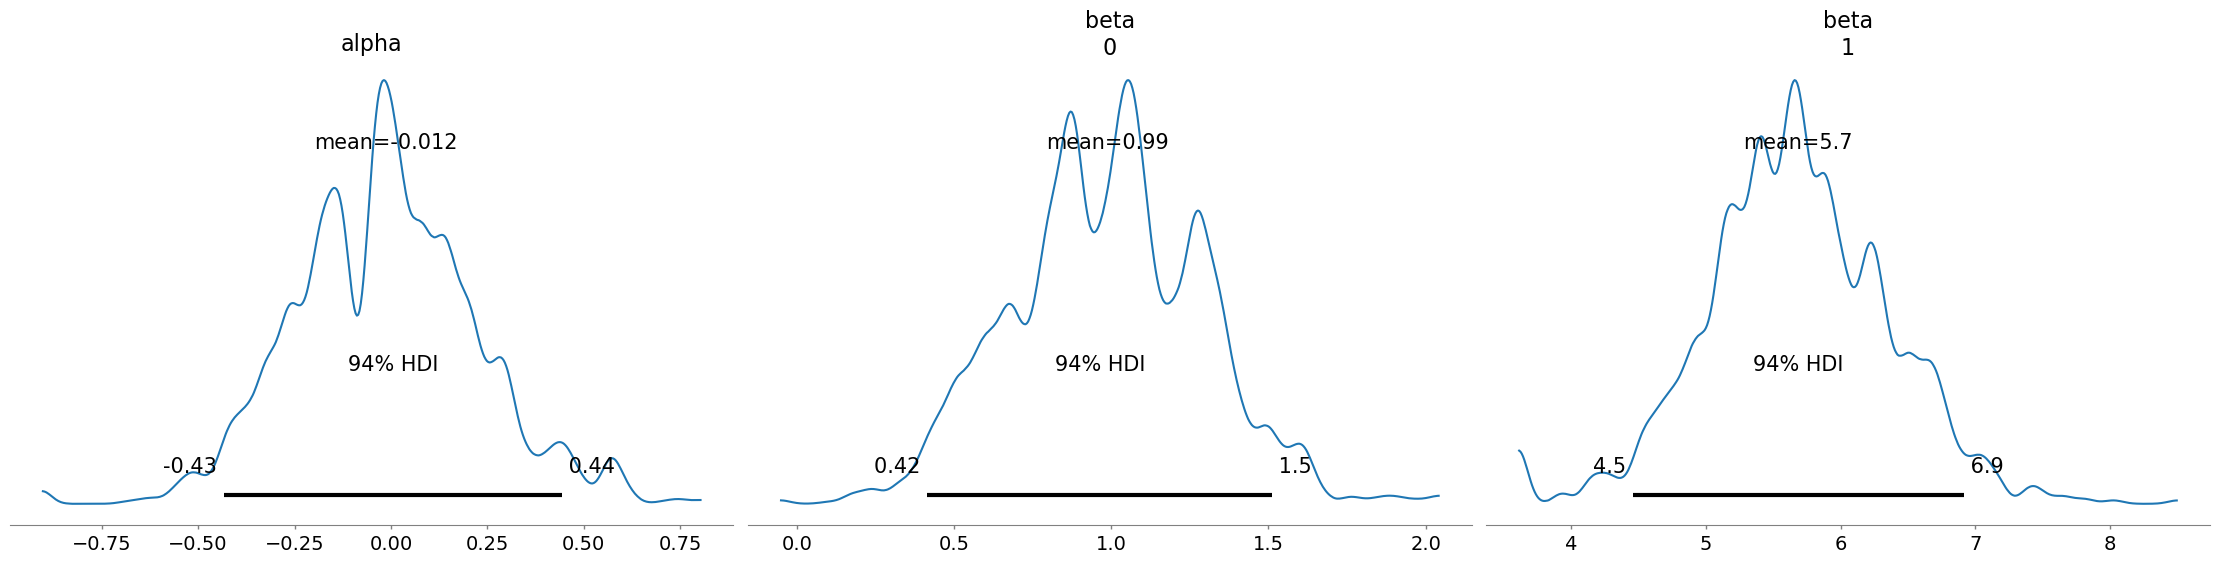

In [42]:
# alphaとbetaの事後分布をプロット
pm.plot_posterior(trace, var_names=['alpha', 'beta'])
plt.show()

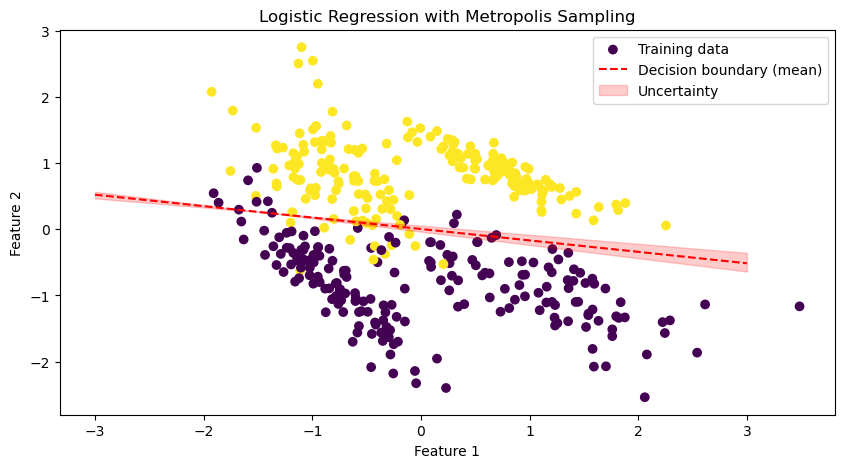

In [49]:
# alphaとbetaの事後分布の平均値と標準偏差を計算
alpha_mean = np.mean(trace['alpha'])
beta_mean = np.mean(trace['beta'], axis=0)
alpha_std = np.std(trace['alpha'])
beta_std = np.std(trace['beta'], axis=0)

# プロット
plt.figure(figsize=(10, 5))

# トレーニングデータをプロット
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training data')

# 決定境界をプロット
x_vals = np.linspace(-3, 3, 100)
y_vals_mean = -(alpha_mean + x_vals * beta_mean[0]) / beta_mean[1]
y_vals_upper = -(alpha_mean + alpha_std + x_vals * (beta_mean[0] + beta_std[0])) / (beta_mean[1] + beta_std[1])
y_vals_lower = -(alpha_mean - alpha_std + x_vals * (beta_mean[0] - beta_std[0])) / (beta_mean[1] - beta_std[1])

plt.plot(x_vals, y_vals_mean, 'r--', label='Decision boundary (mean)')
plt.fill_between(x_vals, y_vals_lower, y_vals_upper, color='red', alpha=0.2, label='Uncertainty')

# 軸のラベルとタイトルを設定
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Metropolis Sampling')
plt.legend(loc='best')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


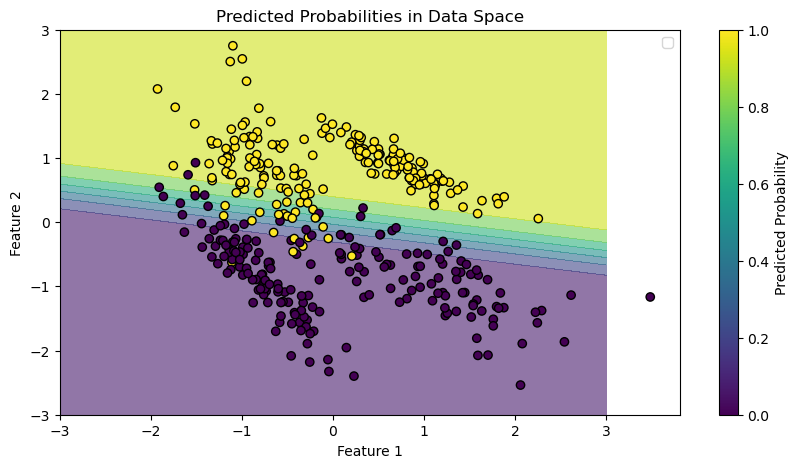

In [53]:
# データ空間上の予測確率を計算するグリッドを生成
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = sp.special.expit(alpha_mean + beta_mean[0] * X + beta_mean[1] * Y)

# プロット
plt.figure(figsize=(10, 5))

# 予測確率をカラーマップとしてプロット
plt.contourf(X, Y, Z, cmap='viridis', alpha=0.6)

# トレーニングデータをプロット
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')

# 軸のラベルとタイトルを設定
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Probabilities in Data Space')
plt.colorbar(label='Predicted Probability')
plt.legend(loc='best')
plt.show()

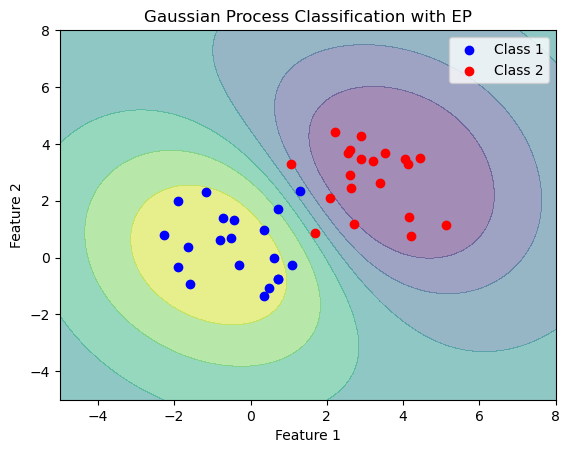

In [48]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# サンプルデータを生成します。
# クラス1のデータ
X1 = np.random.randn(20, 2)
Y1 = np.ones((20, 1))

# クラス2のデータ
X2 = np.random.randn(20, 2) + 3
Y2 = np.zeros((20, 1))

# データを結合します。
X = np.vstack((X1, X2))
Y = np.vstack((Y1, Y2))

# ガウス過程分類モデルを作成します。
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.)
model = GPy.models.GPClassification(X, Y, kernel=kernel)

# EP法を使用して最適化します。
model.optimize('bfgs', max_iters=100)

# 新しいデータ点の予測を行います。
x_test = np.linspace(-5, 8, 100).reshape(-1, 1)
y_test = np.linspace(-5, 8, 100).reshape(-1, 1)
x_test_grid, y_test_grid = np.meshgrid(x_test, y_test)
X_test = np.vstack((x_test_grid.ravel(), y_test_grid.ravel())).T
probs, _ = model.predict(X_test)

# 予測をプロットします。
plt.contourf(x_test_grid, y_test_grid, probs.reshape(100, 100), alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='Class 2')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Process Classification with EP')
plt.show()